In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from IPython.display import HTML
import matplotlib.animation as animation

Text(0.5, 1.0, 'Charge Density')

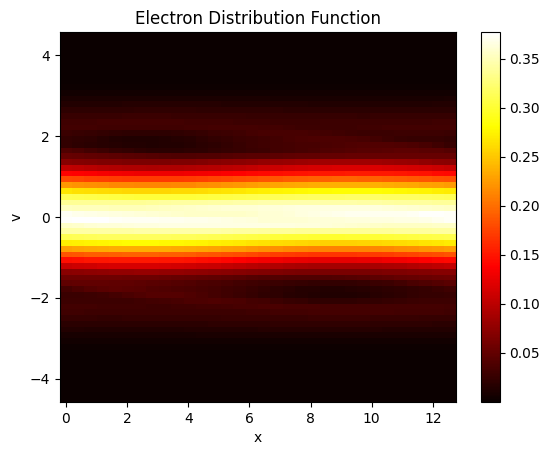

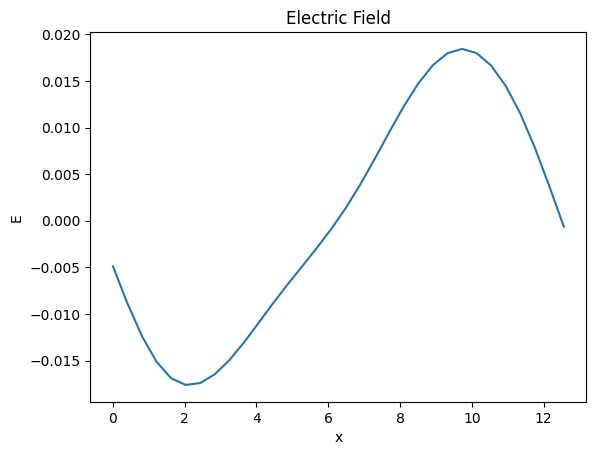

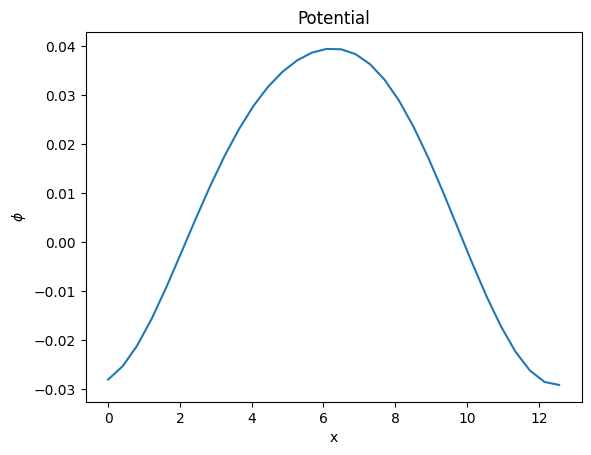

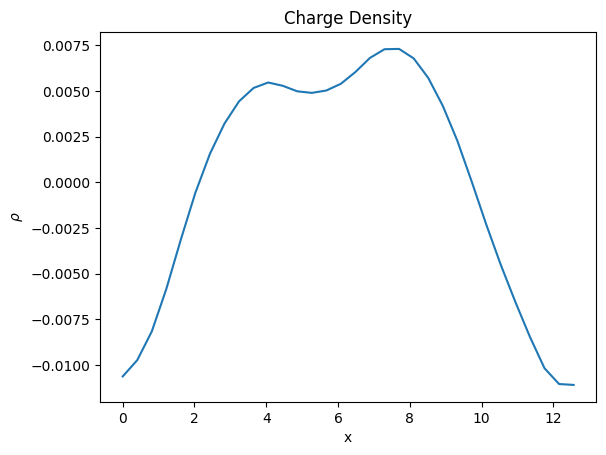

In [11]:
with h5py.File("data/strong_landau.hdf", "r") as f:
    fe = f["VTKHDF/CellData/fe"][:]
    fi = f["VTKHDF/CellData/fi"][:]
    electric_field = f["VTKHDF/CellData/E"][:]
    charge_density = f["VTKHDF/CellData/rho"][:]
    potential_field = f["VTKHDF/CellData/phi"][:]

x = np.linspace(0, 4 * np.pi, fe.shape[1] - 6)
v = np.linspace(-4.5, 4.5, fe.shape[2] - 6)
V, X = np.meshgrid(v, x)
ngc = 3  # number of ghost cells

step = -1
plt.figure()
plt.pcolormesh(X, V, fe[step, ngc:-ngc, ngc:-ngc], shading="auto", cmap="hot")
plt.colorbar()
plt.title("Electron Distribution Function")
plt.xlabel("x")
plt.ylabel("v")

plt.figure()
plt.plot(x, electric_field[step, ngc:-ngc])
plt.xlabel("x")
plt.ylabel("E")
plt.title("Electric Field")

plt.figure()
plt.plot(x, potential_field[step, ngc:-ngc])
plt.xlabel("x")
plt.ylabel("$\\phi$")
plt.title("Potential")

plt.figure()
plt.plot(x, charge_density[step, ngc:-ngc])
plt.xlabel("x")
plt.ylabel("$\\rho$")
plt.title("Charge Density")

Text(0, 0.5, '$\\sum |E|^2$')

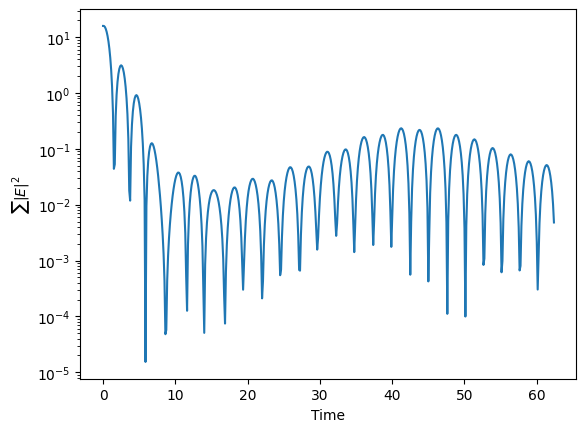

In [12]:
import scipy.signal as signal

E_norm = (electric_field[:, ngc:-ngc] ** 2).sum(axis=1)
dt = 1 / 8
t = np.arange(len(E_norm)) * dt
# plt.plot(t, np.log(E_norm))
plt.semilogy(t, E_norm)
plt.xlabel("Time")
plt.ylabel("$\\sum |E|^2$")
# peaks = signal.find_peaks(E_norm[:300])[0]
# p = np.polyfit(t[peaks], np.log(E_norm[peaks]), 1)
# fit = np.polyval(p, t[peaks])
# plt.plot(t[peaks], fit, "--", label=f"$\\gamma = ${p[0]/2:.3f}")
# plt.legend()

Text(0, 0.5, 'Phase of $E_k$')

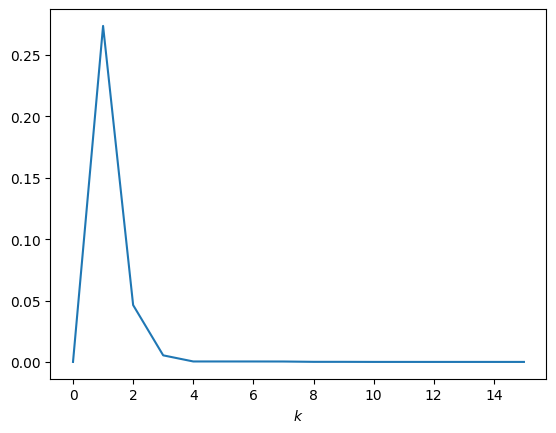

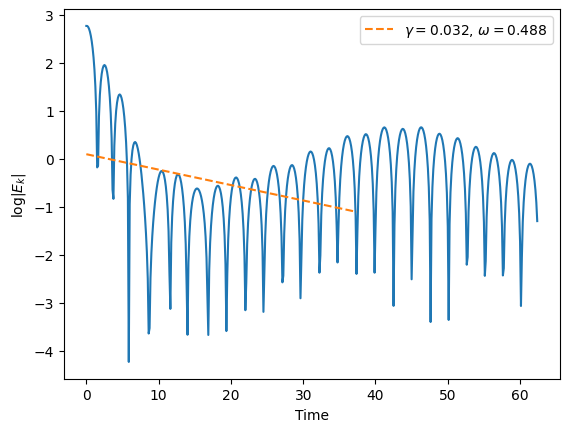

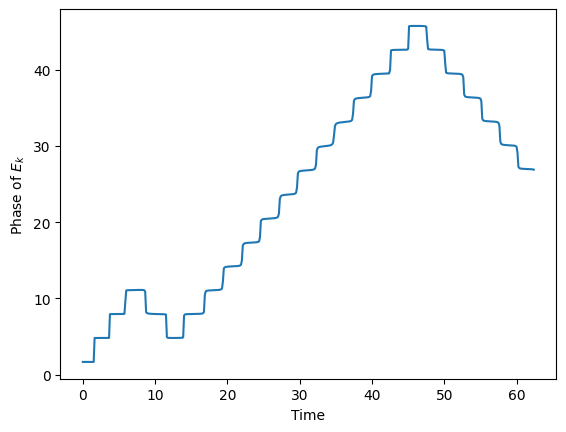

In [10]:
E_fft = np.fft.fft(electric_field[:, ngc:-ngc], axis=1)
plt.figure()
plt.plot(np.abs(E_fft[step, : E_fft.shape[1] // 2]))
plt.xlabel("$k$")

E_k = E_fft[:, 1]
amp = np.abs(E_k)
log_amp = np.log(amp)
p = np.polyfit(t[:300], log_amp[:300], 1)
gamma = -p[0]

phase = np.unwrap(np.angle(E_k))
omega = np.polyfit(t[:200], phase[:200], 1)[0]

plt.figure()
plt.plot(t, log_amp)
plt.plot(
    t[:300],
    np.polyval(p, t[:300]),
    "--",
    label=f"$\\gamma = ${gamma:.3f}, $\\omega = ${omega:.3f}",
)
plt.xlabel("Time")
plt.ylabel("$\\log |E_k|$")
plt.legend()

plt.figure()
plt.plot(t, phase)
plt.xlabel("Time")
plt.ylabel("Phase of $E_k$")

VTKHDF/CellData/phi (61, 61)
VTKHDF/FieldData/X (3721,)
VTKHDF/FieldData/Y (3721,)
VTKHDF/FieldData/iter (1,)


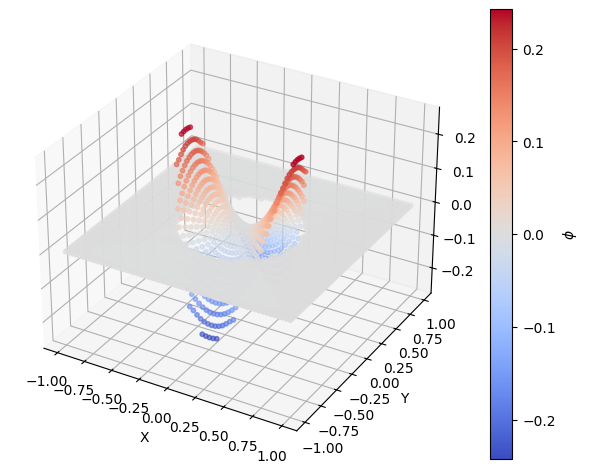

In [14]:
# file = "data/data_example3.hdf"
# file = "data/data_example5.hdf"
file = "data/data_example7.hdf"

with h5py.File(file, "r") as f:
    phi = f["VTKHDF/CellData/phi"][:]
    niter = f["VTKHDF/FieldData/iter"][0]
    X = f["VTKHDF/FieldData/X"][:].reshape(phi.shape)
    Y = f["VTKHDF/FieldData/Y"][:].reshape(phi.shape)
    f.visititems(
        lambda name, obj: (
            print(name, obj.shape) if isinstance(obj, h5py.Dataset) else None
        )
    )
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
scatter = ax.scatter(X, Y, phi, c=phi, cmap="coolwarm", s=10)
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.colorbar(scatter, ax=ax, label="$\\phi$")
plt.tight_layout()

Text(0.5, 1.0, 'data/data_example7.hdf, niter=114')

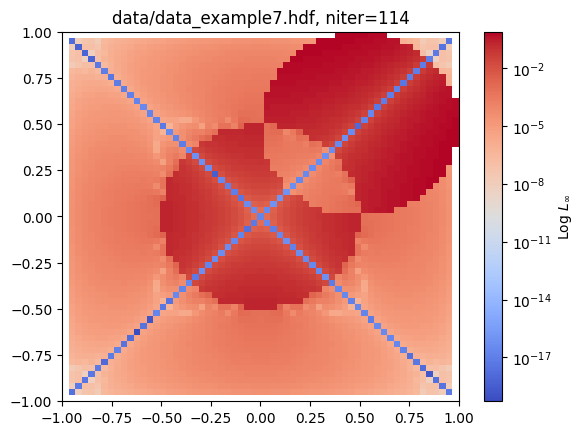

In [15]:
if file == "data/data_example3.hdf":
    u = np.exp(-(X**2) - Y**2)
    u[(X - 0.5) ** 2 + (Y - 0.5) ** 2 > 0.25**2] = 0
if file == "data/data_example5.hdf":
    u = 1 + np.log(2 * np.sqrt(X**2 + Y**2))
    u[X**2 + Y**2 < 0.5**2] = 1
if file == "data/data_example7.hdf":
    u = X**2 - Y**2
    u[(X - 0.5) ** 2 + (Y - 0.5) ** 2 > 0.5**2] = 0

plt.pcolormesh(
    X, Y, np.abs(u - phi), cmap="coolwarm", norm=plt.matplotlib.colors.LogNorm()
)
plt.colorbar(label="Log $L_\\infty$")
plt.title(f"{file}, niter={niter}")

Text(0, 0.5, '$\\phi$')

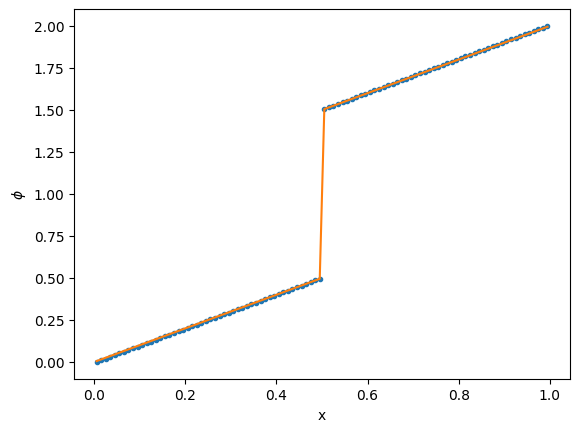

In [21]:
file = "data/data_example1.hdf"
# file = "data/data_example2.hdf"
with h5py.File(file, "r") as f:
    phi = f["VTKHDF/CellData/phi"][:]
    x = f["VTKHDF/FieldData/X"][:].reshape(phi.shape)
    # f.visititems(
    #     lambda name, obj: (
    #         print(name, obj.shape) if isinstance(obj, h5py.Dataset) else None
    #     )
    # )

if file == "data/data_example1.hdf":
    u = np.piecewise(x, [x <= 0.5, x > 0.5], [lambda x: x, lambda x: x + 1])
if file == "data/data_example2.hdf":
    u = np.piecewise(x, [(0.3 <= x) & (x <= 0.6)], [lambda x: np.exp(-(x**2)), 0])
plt.plot(x, phi, ".")
plt.plot(x, u)
plt.xlabel("x")
plt.ylabel("$\\phi$")